<a href="https://colab.research.google.com/github/ujjalkumarmaity/Loan_Predction/blob/master/project_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# PREPROSSING

In [3]:
data = pd.read_csv('/content/drive/My Drive/project/clean.csv')
data.head()

,Unnamed: 0,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,100,30000,36 months,5,MORTGAGE,100000.0,Source Verified,1,0.0,debt_consolidation,30.46,0.0,Jan-2012,0.0,11.0,1.0,37.0,19.0,0.0,0.0,0.0,1.0,0.0
1,152,40000,60 months,1,MORTGAGE,45000.0,Verified,1,0.0,credit_card,50.53,0.0,Jun-2009,0.0,18.0,0.0,64.5,37.0,0.0,0.0,0.0,0.0,0.0
2,170,20000,36 months,10,MORTGAGE,100000.0,Not Verified,1,0.0,credit_card,18.92,0.0,Feb-1999,0.0,9.0,0.0,29.9,19.0,0.0,0.0,0.0,0.0,0.0
3,186,4500,36 months,10,RENT,38500.0,Not Verified,1,0.0,credit_card,4.64,0.0,Dec-2003,0.0,12.0,0.0,15.3,25.0,0.0,0.0,0.0,0.0,0.0
4,215,8425,36 months,3,MORTGAGE,450000.0,Verified,1,0.0,credit_card,12.37,0.0,Oct-1997,0.0,21.0,0.0,65.7,37.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.isnull().sum()

Unnamed: 0                    0
loan_amnt                     0
term                          0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
desc                          0
purpose                       0
dti                          14
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                1
open_acc                      0
pub_rec                       0
revol_util                  762
total_acc                     0
acc_now_delinq                0
chargeoff_within_12_mths     56
delinq_amnt                   0
pub_rec_bankruptcies        697
tax_liens                    39
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
desc                        0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_util                  0
total_acc                   0
acc_now_delinq              0
chargeoff_within_12_mths    0
delinq_amnt                 0
pub_rec_bankruptcies        0
tax_liens                   0
dtype: int64

In [6]:
from sklearn import preprocessing
lavel_encoder=preprocessing.LabelEncoder()
col=data.columns
for i in col:
  if data[i].dtype==object:
    data[i]=lavel_encoder.fit_transform(data[i])
data.dtypes

Unnamed: 0                    int64
loan_amnt                     int64
term                          int64
emp_length                    int64
home_ownership                int64
annual_inc                  float64
verification_status           int64
loan_status                   int64
desc                        float64
purpose                       int64
dti                         float64
delinq_2yrs                 float64
earliest_cr_line              int64
inq_last_6mths              float64
open_acc                    float64
pub_rec                     float64
revol_util                  float64
total_acc                   float64
acc_now_delinq              float64
chargeoff_within_12_mths    float64
delinq_amnt                 float64
pub_rec_bankruptcies        float64
tax_liens                   float64
dtype: object

train test split

In [0]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='loan_status',axis=1,inplace=False)
y=data['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)

# AUC Score

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
def auc_csore(probs,test):
  #probs = predict_data[:, 1]
  auc = roc_auc_score(test, probs)
  print(' AUC: %.3f' % auc)
  fpr, tpr, thresholds = roc_curve(test, probs)
  print(fpr,tpr,thresholds)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy testing 0.803522198397249
accuracy train 0.803035262139041
 AUC: 0.500
[0.         0.99938111 1.        ] [0.         0.99939269 1.        ] [2 1 0]


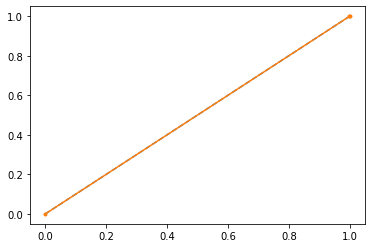

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('accuracy testing',accuracy_score(y_test,pred))
pred=model.predict(x_train)
print('accuracy train',accuracy_score(y_train,pred))
auc_csore(pred,y_train)

# KNN

accuracy test 0.769703362614994
accuracy train 0.8218836730249077
 AUC: 0.596
[0.         0.77610333 1.        ] [0.         0.96821567 1.        ] [2 1 0]


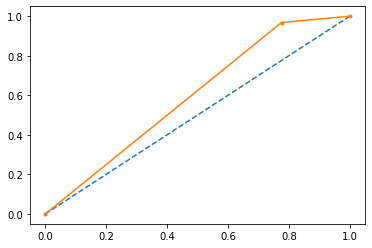

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
predict_k=model.predict(x_test)
print('accuracy test',accuracy_score(y_test,predict_k))
pred=model.predict(x_train)
print('accuracy train',accuracy_score(y_train,pred))
auc_csore(pred,y_train)

# CART 

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predict_k=model.predict(x_test)
print('accuracy in test',accuracy_score(y_test,predict_k))
predict_k=model.predict(x_train)
print('accuracy in train',accuracy_score(y_train,predict_k))

accuracy in test 0.7002425865357061
accuracy in train 1.0


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('accuracy of test',accuracy_score(pred,y_test))
pred_t=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_t,y_train))

accuracy of test 0.8034406774636614
accuracy of train 0.8029841593530874


In [12]:
pred=pred.tolist()
pred.count(0)

327

#Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
print('accuracy of test ',accuracy_score(pred_test,y_test))
pred_train=model.predict(x_train)
print('accuracy of train',accuracy_score(pred_train,y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of test  0.7792240195254988
accuracy of train 0.9920279653912466
